<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **이변량 분석 ③ - 범주형  → 범주형**

- 시각화와 수치화 방법으로 두 범주형 변수 간 관계를 분석합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/two_var_03.png' width=600 align='left'/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/analysis3.png' width=620 align='left'/>

## **1. 환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 읽어옵니다.

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Titanic 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.1.csv'
titanic = pd.read_csv(path)
titanic.head()

,Survived,Pclass,Title,Sex,Age,Fare,Embarked,AgeGroup,Family,Mother
0,0,3,Mr,male,22.0,7.2500,S,Age_20,2,0
1,1,1,Mrs,female,38.0,71.2833,C,Age_30,2,0
2,1,3,Miss,female,26.0,7.9250,S,Age_20,1,0
3,1,1,Mrs,female,35.0,53.1000,S,Age_30,2,0
4,0,3,Mr,male,35.0,8.0500,S,Age_30,1,0


## **2. 교차표**

- 범주 vs 범주 를 비교하기 위해서는 Pandas의 **crosstab()** 함수를 사용해 **교차표**를 먼저 만들어야 합니다.
- **Sex → Survived** 관계를 비교하기 위해 교차표를 만들어봅니다.

In [3]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


- 참고로, 위 교차표는 다음과 같이 groupby() 메소드를 사용해 집계한 후 pivot 형태로 변환한 것과 같습니다.

In [4]:
tmp = titanic.groupby(by=['Sex', 'Survived'], as_index=False)['Fare'].count()
tmp.columns = ['Sex', 'Survived', 'Cnt']
tmp.pivot(index='Sex', columns='Survived', values='Cnt')

Survived,0,1
Sex,,
female,81,233
male,468,109


- **Embarked → Survived** 관계를 비교하기 위해 교차표를 만들어봅니다.

In [5]:
pd.crosstab(titanic['Embarked'], titanic['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


- 교차표는 다음과 같은 **normalize** 매개변수 값에 따라 다른 결과를 보여줍니다.
    - 'index': 각 행의 합으로 각 요소를 나눠서 각 행의 상대적인 비율을 보여줍니다(각 행의 합이 1이 됨).
    - 'columns': 각 열의 합으로 각 요소를 나눠서 각 열의 상대적인 비율을 보여줍니다(각 열이 합이 1이 됨).
    - 'all': 전체 합으로 각 요소를 나눠서 전체 데이터셋에서 각 셀의 상대적인 비율을 보여줍니다(전체 합이 1이 됨).

<img src='https://raw.githubusercontent.com/Jangrae/img/master/cross.png' width=700 align='left'/>


- **Embarked → Survived** 관계를 교차표로 normalize 매개변수 값을 바꿔가면서 표시해봅니다.

In [18]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='columns')  # normalize => column에서 차지하는 비율

Survived,0,1
Embarked,,
C,0.136612,0.271930
Q,0.085610,0.087719
S,0.777778,0.640351


In [7]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')  # index기준으로 비율

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


In [8]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='all')  # 전체에서의 비율

Survived,0,1
Embarked,,
C,0.084175,0.104377
Q,0.052750,0.033670
S,0.479237,0.245791


## **3. 시각화**

- 다음과 같은 방법으로 범주형 → 범주형 비교를 시각화할 수 있습니다.
    -  100% Stacked Bar
    -  Mosaic Plot


- 위 두 가지 방법으로 **Pclass → Survived** 관계를 시각화해서 비교해 봅니다.

**1) 100% Stacked Bar**

- 우선 **normalize='index'** 를 설정한 교차표를 작성합니다.
- Pclass 변수가 세 개의 범줏값을 가지므로 세 개의 행이 생깁니다.
- normalize='index'를 지정했으므로 각 행의 합은 1이 됩니다.

In [9]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')
table

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


- 위 교차표에 대해 Stacked Bar를 그립니다.
- Stacked Bar는 Pandas의 **plot()** 메소드로 쉽게 그릴 수 있습니다.
- 각 행별로 Stacked Bar가 그려지며, 각 행의 합이 1이므로 같은 높이를 갖습니다.
- 그래서 100% Stacked Bar 라고 부릅니다.
- **axhline()** 함수를 사용해 Survived 열 평균을 표시하는 가로선도 표시해봅니다.
- Survived 열 평균, 즉 titanic['Survived'].mean() 은 생존율을 의미합니다.
- 그런데 Stacked Bar 하단이 사망(Survived=0)을 의미합니다.
- 그래서 일관된 표시를 위해 1 - titanic['Survived'].mean() 을 표시합니다.

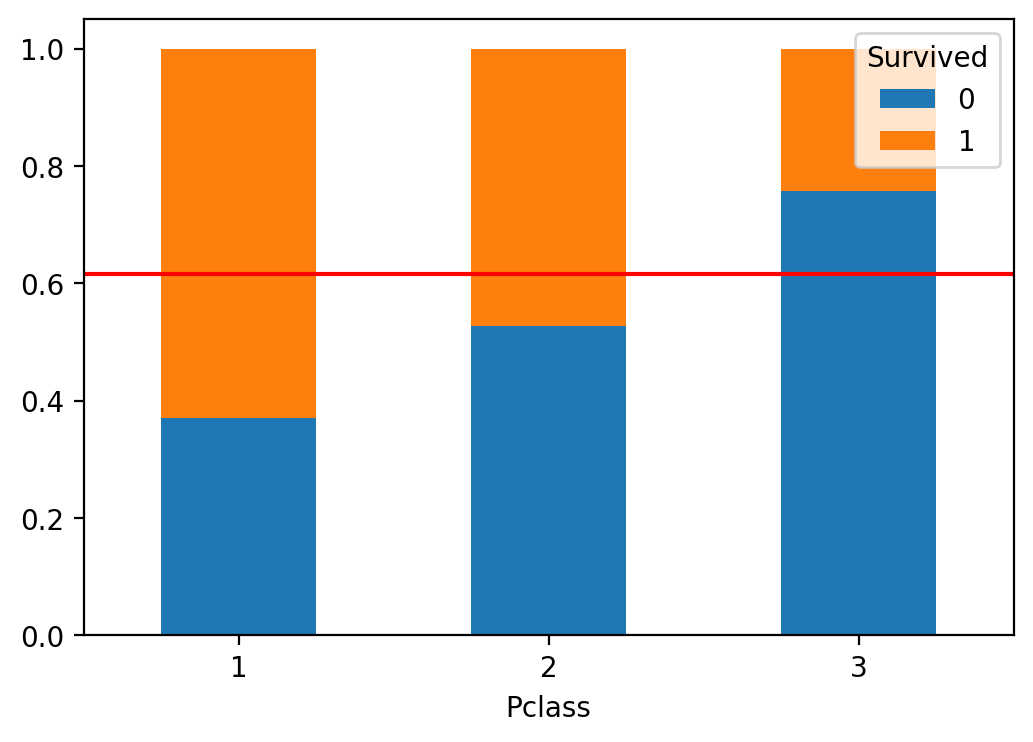

In [10]:
table.plot(kind='bar', stacked=True)

plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


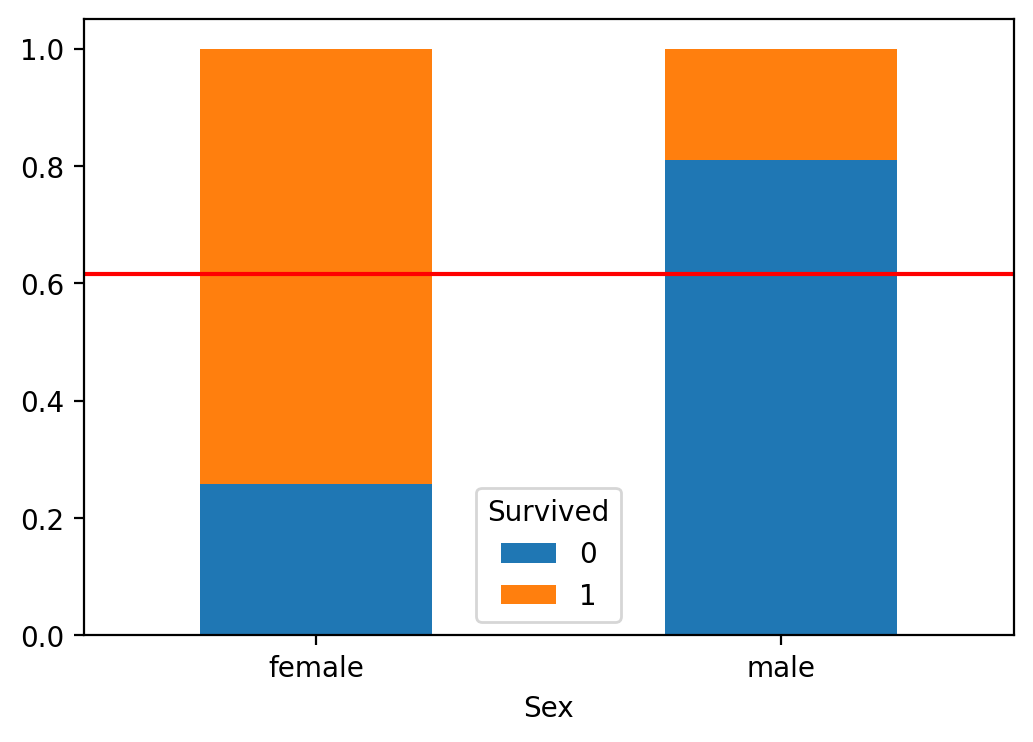

In [11]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


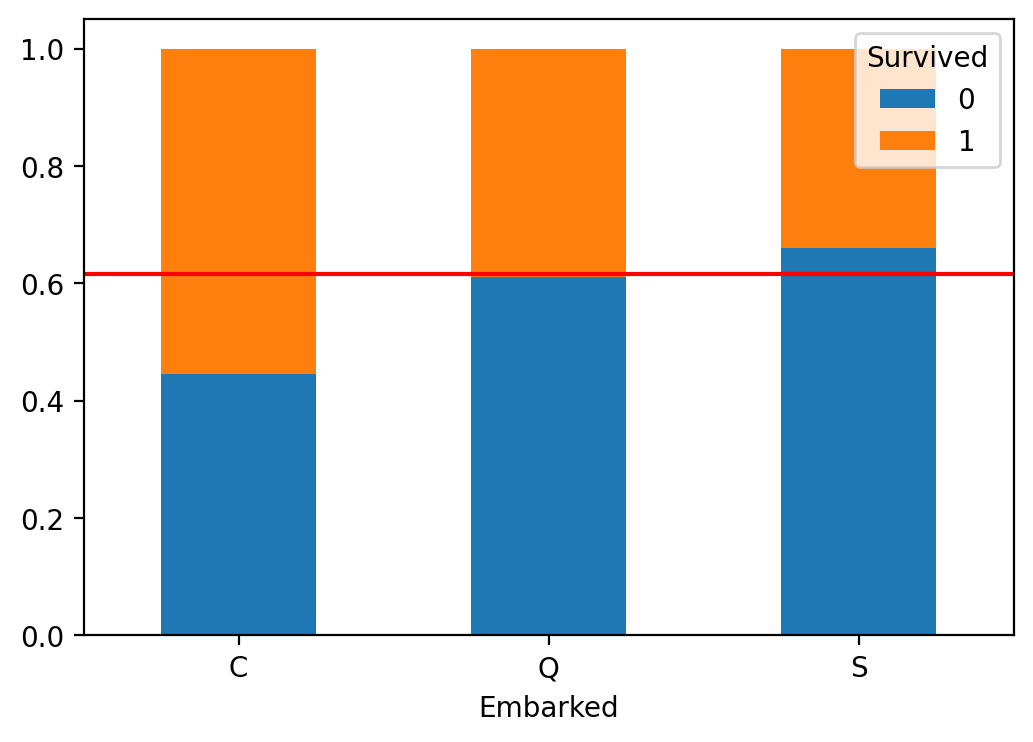

In [12]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

titanic 데이터프레임의 다음 변수들 간의 관계를 100% Bar Plot 으로 시각화해 확인하세요.

**1️⃣ Title → Survived**

Survived,0,1
Title,,
Master,0.439024,0.560976
Miss,0.297297,0.702703
Mr,0.839388,0.160612
Mrs,0.203125,0.796875
Others,0.785714,0.214286


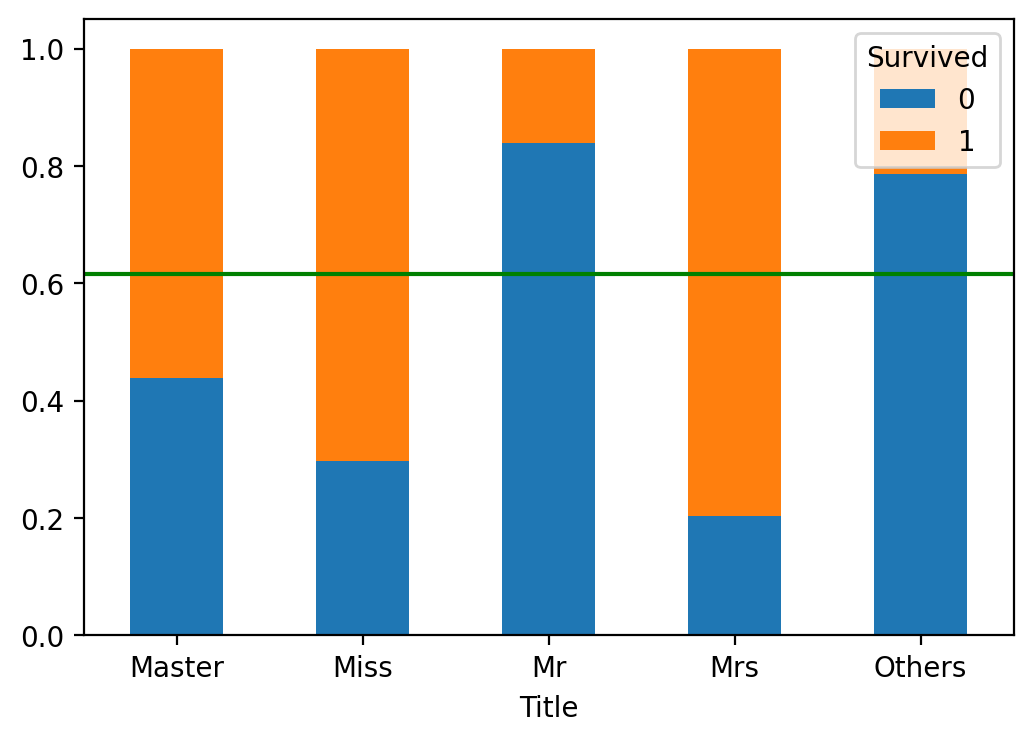

In [20]:
table = pd.crosstab(titanic['Title'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='g')
plt.xticks(rotation=0)
plt.show()

**2️⃣ AgeGroup → Survived**

Survived,0,1
AgeGroup,,
Age_00,0.393939,0.606061
Age_10,0.598039,0.401961
Age_20,0.613281,0.386719
Age_30,0.666667,0.333333
Age_40,0.622222,0.377778
Age_50,0.583333,0.416667
Age_60,0.684211,0.315789
Age_70,1.000000,0.000000
Age_80,0.000000,1.000000


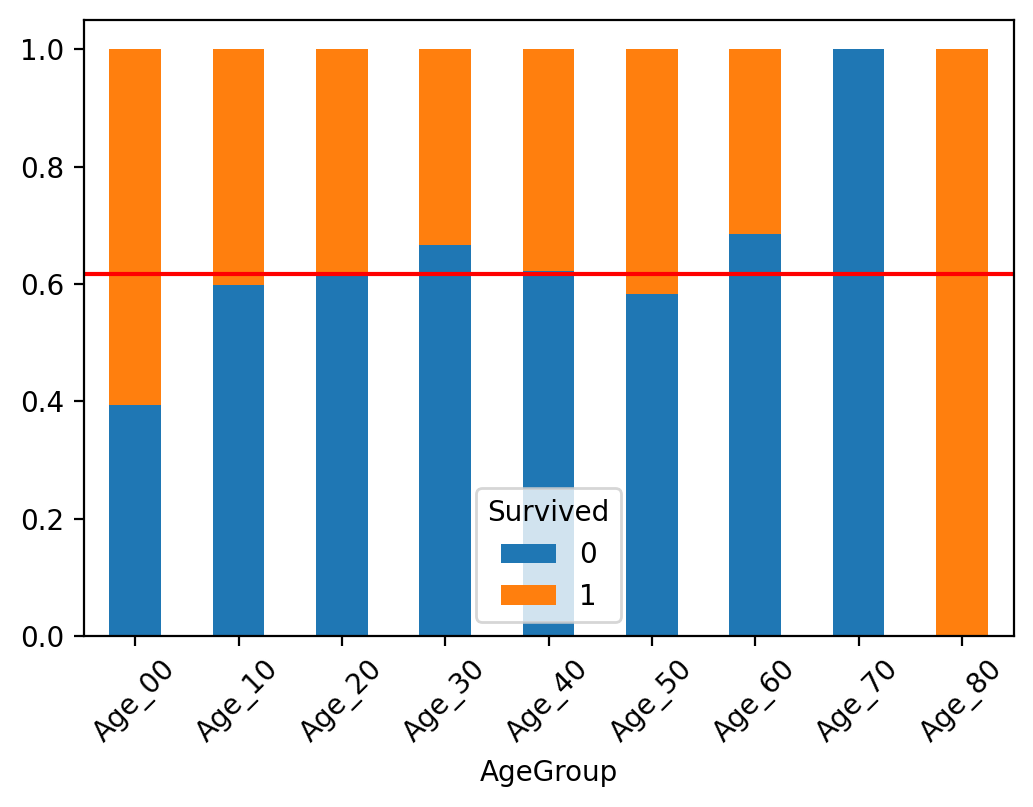

In [22]:
table = pd.crosstab(titanic['AgeGroup'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=45)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**2) Mosaic Plot**

- 100% Stacked Bar는 비율만 비교하므로 양에 대한 비교는 할 수 없습니다.
- Mosaic Plot으로 **양에 대한 비교**를 해봅니다.
- **tatsmodels.graphics.mosaicplot**의 **mosaic()** 함수로 Mosaic Plot을 그립니다.

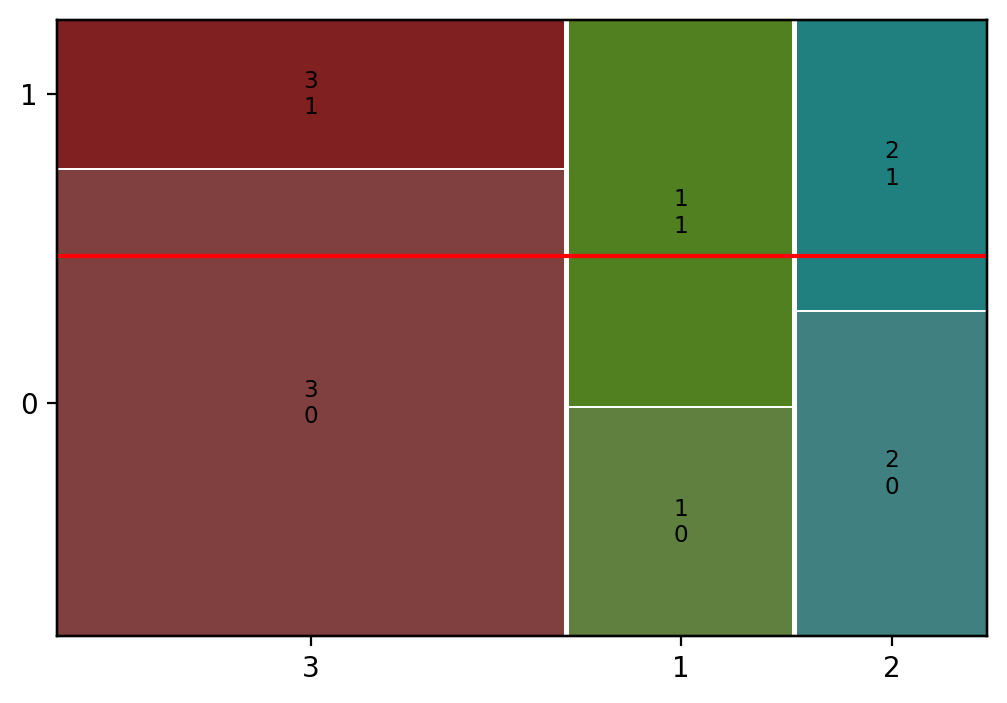

In [13]:
mosaic(titanic, ['Pclass', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

- 위 그래프의 x축 길이는 각 객실 등급별 승객 비율을 나타냅니다.  
- y축 길이는 객실 승객의 사망, 생존 비율을 의미합니다.
- **sort_values()** 메소드를 사용해 원하는 순서로 정렬해 표시할 수 있습니다.
- **gap** 옵션으로 영역들 사이 간격을 조정할 수 있습니다.

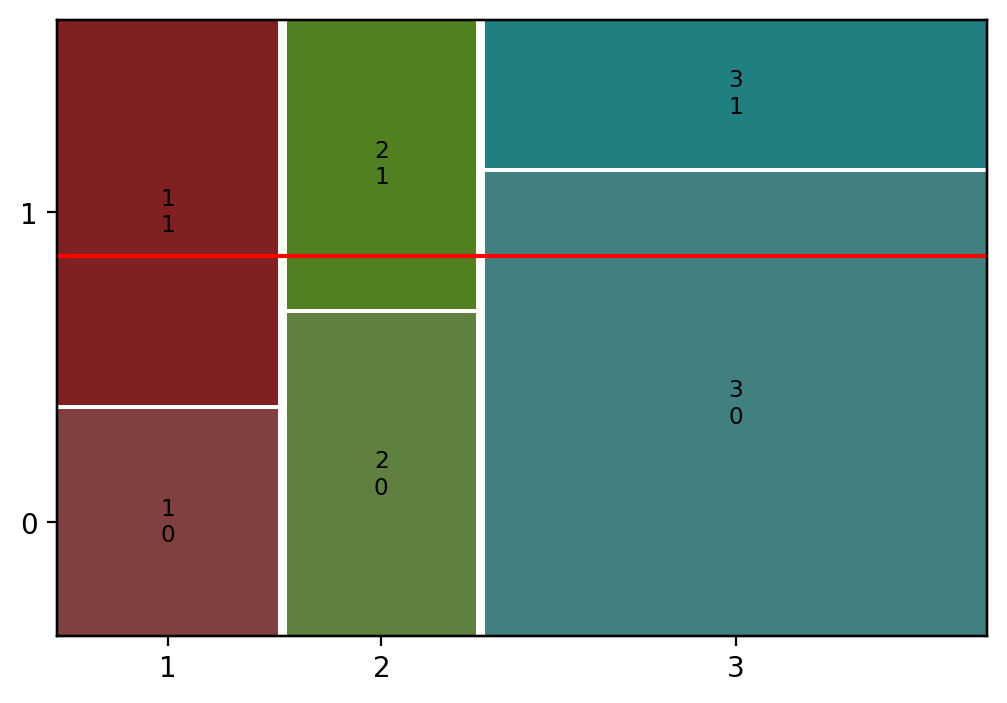

In [23]:
mosaic(titanic.sort_values(['Pclass', 'Survived']), ['Pclass', 'Survived'], gap=0.01)  # sort_values를 통해 정렬된 데이터를 이용
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

titanic 데이터프레임의 다음 변수들 간의 관계를 Mosaic Plot 으로 시각화해 확인하세요.

**1️⃣ Sex → Survived**

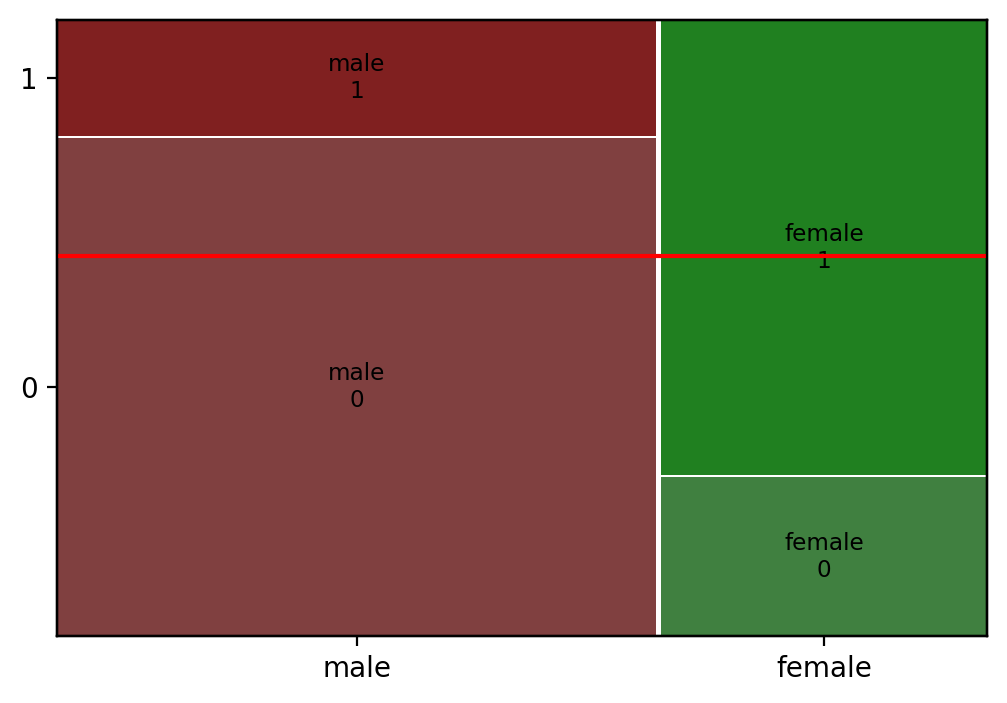

In [24]:
mosaic(titanic, ['Sex', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

**2️⃣ Embarked → Survived**

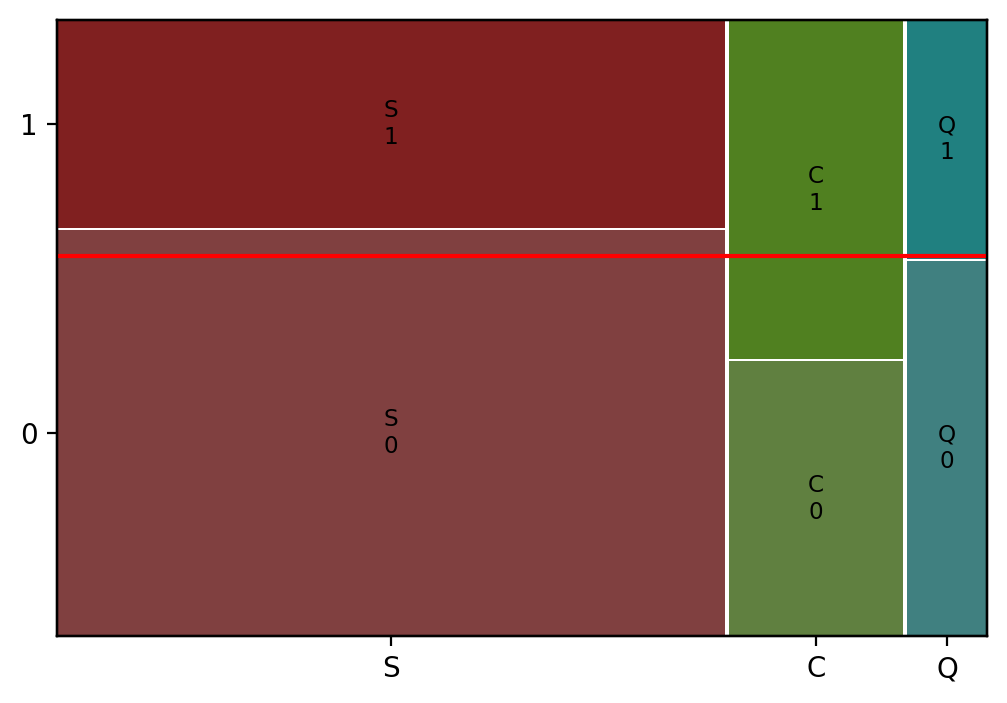

In [25]:
mosaic(titanic, ['Embarked', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

**3️⃣ Title → Survived**

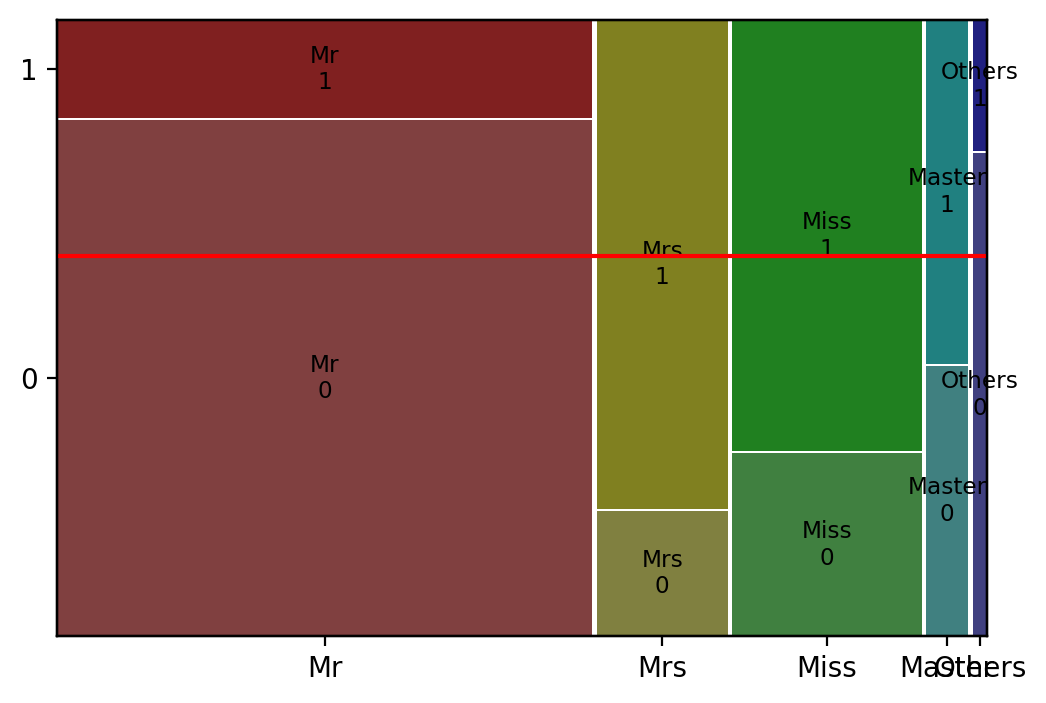

In [28]:
mosaic(titanic, ['Title', 'Survived'])#, label_rotation=(90,0))
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**📌 시각화 결과를 분석하는 방법**

- 한 가지만 기억하세요! 귀무가설이 참일 때 나올 그래프의 모양(아래 그림)
- 여기서 벗어나면, '차이가 있다'., '관련이 있다'는 말입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%AA%A8%EC%9E%90%EC%9D%B5.png?raw=true' width=700/>

**참고:  Mosaic Plot을 3 범주로 그리기**

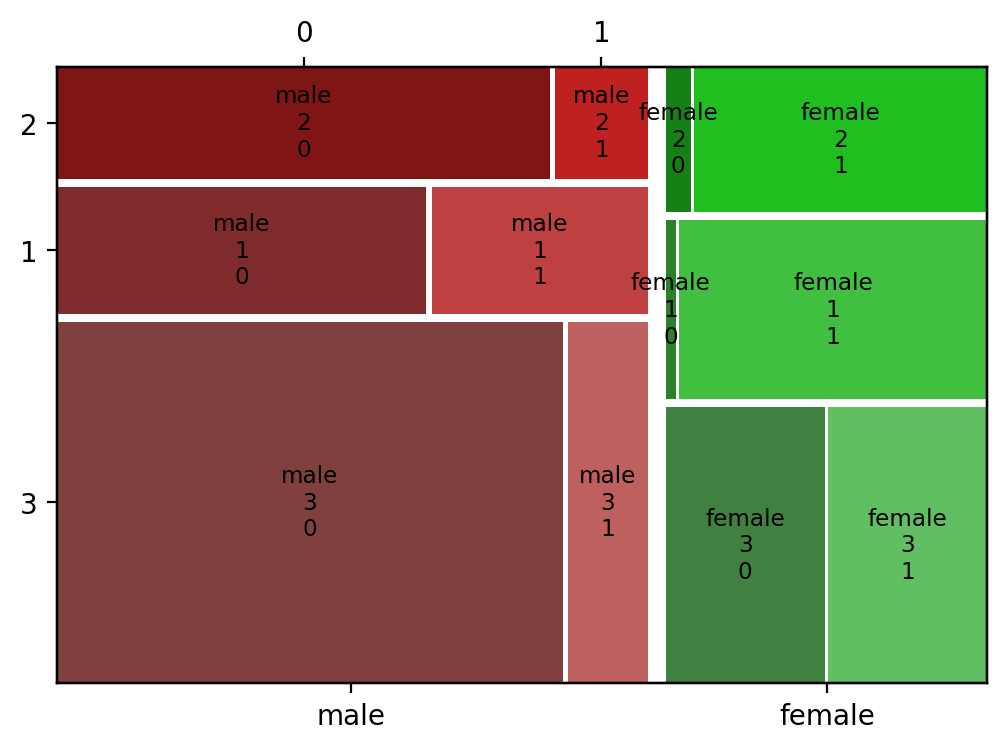

In [15]:
mosaic(titanic, ['Sex', 'Pclass', 'Survived'], gap=0.02)
plt.show()

## **4. 수치화**

- 범주형 → 범주형 관계를 수치와해 비교할 때는 **카이제곱검정(Chi-Squared Test)** 을 사용합니다.
- **scipy.stats** 라이브러리의 **chi2_contingency()** 함수로 카이제곱검정을 수행합니다.
- 카이제곱검정은 $x^2$검정으로도 불립니다.

<img src = "https://github.com/Jangrae/img/blob/master/chi2.png?raw=true" width=300 align="left"/>

- 카이제곱통계량은
    - 클수록 기대빈도로부터 실제 값의 차이가 크다는 의미입니다.
    - 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있습니다.
    - 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 봅니다.

- 범주형 변수의 자유도: 범주의 수 - 1

- 카이제곱검정에서는
    - x 변수의 자유도 × y 변수의 자유도
    - 예: Pclass → Survived
        - Pclass: 범주가 3개, Survived: 2개
        - (3-1) * (2-1) = 2
        - 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면 차이가 있다고 볼수 있습니다.


- **Pclass → Survived** 관계를 카이제곱검정을 사용해 확인해봅니다.
- 우선 교차표를 만들고 확인합니다.

In [16]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


- 이 교차표를 사용해 카이제곱검정을 수행합니다.

In [31]:
result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 기대빈도:\n',result[3])
print('='*28)
print(result)  # dof 가 자유도 => 8 * (2~3) 보다 크면 ...뭐?

* 카이제곱통계량: 2.3248208157213828
* p-value: 0.9693999217950655
* 기대빈도:
 [[0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]]
Chi2ContingencyResult(statistic=2.3248208157213828, pvalue=0.9693999217950655, dof=8, expected_freq=array([[0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786]]))


<img src = "https://github.com/Jangrae/img/blob/master/chi.png?raw=true" width=800 align="left"/>

📌 **기대빈도 계산**

**1)** $\frac{549 \times 216}{891}$
**2)** $\frac{549 \times 184}{891}$
**3)** $\frac{549 \times 491}{891}$
**4)** $\frac{342 \times 216}{891}$
**5)** $\frac{342 \times 184}{891}$
**6)** $\frac{342 \times 491}{891}$



📌 **카이제곱통계량 계산**

$\large x^2$$=\frac{(80-133.0909)^2}{133.0909}+\frac{(97-113.3737)^2}{113.3737}+\frac{(372-302.5354)^2}{302.5354}+\frac{(136-82.90909)^2}{82.90909}+\frac{(87-70.62626)^2}{70.62626}+\frac{(119-188.4646)^2}{188.4646}=102.889$

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

titanic 데이터프레임의 다음 변수들 간의 관계를 카이제곱검정으로 확인하세요.

**1️⃣ Sex → Survived**

In [32]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'])
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [40]:
result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 자유도:', result[2])
print('* 기대빈도:\n',result[3])
print('='*28)
print(result) 

* 카이제곱통계량: 289.1953165452417
* p-value: 2.318405007221846e-61
* 자유도: 4
* 기대빈도:
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))


**2️⃣ Embarked → Survived**

In [34]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'])
table

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [39]:
result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 자유도:', result[2])
print('* 기대빈도:\n',result[3])
print('='*28)
print(result) 

* 카이제곱통계량: 289.1953165452417
* p-value: 2.318405007221846e-61
* 자유도: 4
* 기대빈도:
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))


**3️⃣ Title → Survived**

In [36]:
table = pd.crosstab(titanic['Title'], titanic['Survived'])
table

Survived,0,1
Title,,
Master,18,23
Miss,55,130
Mr,439,84
Mrs,26,102
Others,11,3


In [38]:
result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 자유도:', result[2])
print('* 기대빈도:\n',result[3])
print('='*28)
print(result) 

* 카이제곱통계량: 289.1953165452417
* p-value: 2.318405007221846e-61
* 자유도: 4
* 기대빈도:
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>